# <font color='Purple'>**FashionMNIST ANN using PyTorch**</font>

## <font color='green'>**1. Dataset Information**</font>
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes, consisting of 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', and 'Ankle boot'. Each training and test example is assigned to one of the following labels:0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. 

To work with ANN, the FashionMNIST data has to be reshaped  from a 28x28 image to a flattened 1x784 vector to mimic a single row of 784 features.

## <font color='green'>**2. Import the Required Libraries & Modules**</font>
Torchvision should have been installed by the environment file during setup. 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
import torchvision
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt

## <font color='green'>**3. Load the MNIST dataset**</font>
PyTorch makes the MNIST dataset available through [torchvision]('https://pytorch.org/docs/stable/torchvision/index.html'). The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.
### **Define transform**
As part of the loading process, multiple transformations (reshape, convert to tensor, normalize, etc.) can be applied to the incoming data.
For this project convert images to tensors is the only transformation to be applied. 

In [2]:
transform = transforms.ToTensor()
#Define a transform to convert to images to tensor and normalize
#transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,),)]) 
#mean and std have to be sequences (e.g., tuples), 
# therefore we should add a comma after the values

### **Load the training set**

In [3]:
train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
train_data

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

### **Load the test set**
There's a companion set of FashionMNIST data containing 10,000 records accessible by setting train=False. As before, torchvision will only download this once, and in the future will look for the local copy.

In [4]:
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

### **Examine a training record**

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Calling the first record from <tt>train_data</tt> returns a two-item tuple. The first item is our 28x28 tensor representing the image (the pixel-values of the associated image). The second is a label, in this case the number "9".

In [6]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 9


## <font color='green'>**4. Dataset Visualization**</font>
Matplotlib can interpret pixel values through a variety of [colormaps](https://matplotlib.org/tutorials/colors/colormaps.html).

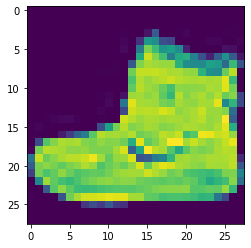

In [7]:
plt.imshow(train_data[0][0].reshape((28,28)));

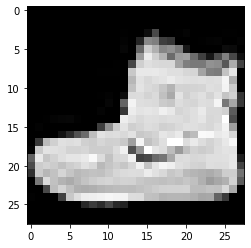

In [8]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray");

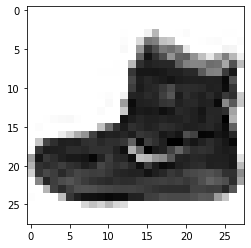

In [9]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gist_yarg");

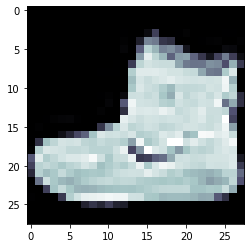

In [10]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="bone");

### **Batch loading with DataLoader**
The training set contains 60,000 records. Looking ahead to the model there are 784 (28 x28 = 784) incoming features, hidden layers of 120 and 84 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:

$\begin{split}\quad(784\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
94080+120+10080+84+840+10 &= 105,214\end{split}$

For this reason it makes sense to load training data in batches using [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [11]:
torch.manual_seed(101)  # for consistent results
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In the cell above, **train_data** is a PyTorch [Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) object (an object that supports data loading and sampling).
The **batch_size** is the number of records to be processed at a time. If it's not evenly divisible into the dataset, then the final batch contains the remainder.
Setting **shuffle** to True means that the dataset will be shuffled after each epoch.

**NOTE:** DataLoader takes an optional **num_workers** parameter that sets up how many subprocesses to use for data loading. This behaves differently with different operating systems so it is omitted here. See [the docs](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for more information.

### **View a batch of images**
Once a DataLoader is defined, create a grid of images using [torchvision.utils.make_grid](https://pytorch.org/docs/stable/torchvision/utils.html#torchvision.utils.make_grid)

In [12]:
# Grab the first batch of images
for images,labels in train_loader: 
    break

images.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [13]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

Labels:  [0 8 9 3 9 7 6 7 1 0 6 3]


In [14]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

Labels:  [   8    4    5    4    2    4    8    9    9    5    4    6]


Combining all steps done above:

Labels:  [   4    9    9    5    6    3    9    4    0    2    7    4]


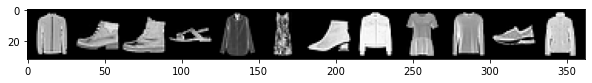

In [15]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC (c = color channel, w = width, h = height)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

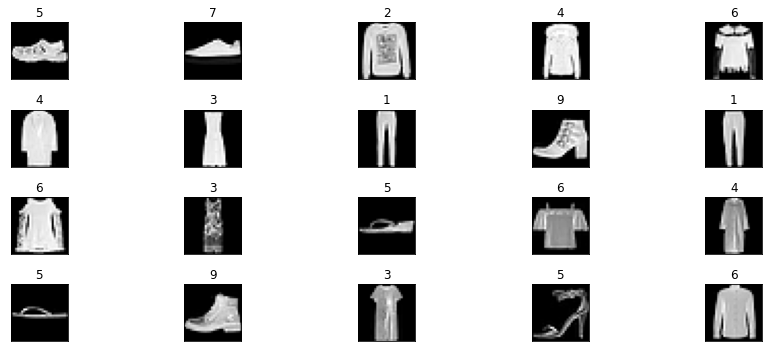

In [16]:
dataiter = iter(train_loader)
print(dataiter)
images, labels = next(dataiter)
fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  # xticks=[], yticks=[] is empty to print the images without any ticks around them
  #np.sqeeze : Remove single-dimensional entries from the shape of an array.
  ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
   # .item() gets the value contained in a Tensor
  ax.set_title(labels[idx].item())
  fig.tight_layout();

In [17]:
labels 

tensor([5, 7, 2, 4, 6, 4, 3, 1, 9, 1, 6, 3, 5, 6, 4, 5, 9, 3, 5, 6, 9, 4, 7, 7,
        3, 4, 1, 0, 3, 5, 9, 5, 9, 8, 1, 2, 8, 5, 4, 2, 7, 4, 7, 8, 2, 3, 6, 0,
        4, 4, 2, 4, 7, 5, 8, 6, 8, 4, 9, 1, 5, 7, 4, 9, 6, 4, 6, 6, 5, 1, 3, 7,
        7, 8, 2, 4, 1, 3, 7, 9, 9, 1, 3, 7, 9, 5, 7, 5, 3, 7, 8, 2, 5, 7, 5, 2,
        0, 7, 8, 3])

In [18]:
class_labels = {0:'T-shirt/top', 1:'Trouser', 2: 'Pullover', 3: 'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7: 'Sneaker', 8:'Bag', 9: 'Ankle boot'}
class_labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Defining a function that return the name of class_labels for the label number. ex. if the label is 9, we return Ankle Boot.

In [19]:
def mapping(label):
    mapping = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 
               5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
    input = (label.item() if type(label) == torch.Tensor else label)
    return mapping[input]

In [20]:
dataiter = iter(train_loader)
print(dataiter)
images, labels = next(dataiter)
print(type(images), type(labels))
print(images.shape, labels.shape)

print("Class_labels: ", )
for i, label in enumerate(labels):
    print(mapping(label), end=", ")

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([100, 1, 28, 28]) torch.Size([100])
Class_labels: 
Coat, Sneaker, Bag, Coat, Sandal, Coat, Coat, Dress, Sneaker, T-shirt/top, Shirt, Sandal, Ankle boot, Sandal, Shirt, Pullover, Pullover, Trouser, Pullover, Pullover, Trouser, Pullover, Coat, Trouser, Dress, Dress, Trouser, Dress, Coat, Coat, Bag, Ankle boot, Sneaker, Sneaker, Trouser, Bag, Shirt, Ankle boot, Sneaker, Dress, Shirt, Pullover, Ankle boot, Sneaker, Sneaker, Bag, Trouser, T-shirt/top, Shirt, Sneaker, Dress, Ankle boot, Dress, Sneaker, Pullover, T-shirt/top, Sneaker, Sandal, Bag, T-shirt/top, Dress, T-shirt/top, Coat, Shirt, Bag, Sandal, Coat, Sandal, Shirt, Shirt, Pullover, T-shirt/top, Ankle boot, T-shirt/top, Sandal, T-shirt/top, Pullover, T-shirt/top, Coat, Shirt, Coat, Dress, Shirt, T-shirt/top, Sneaker, Pullover, Pullover, Sandal, Shirt, Sandal, Shirt, Shirt, Trouser, Dress, Shirt, Ankle boot, Trouser, Ankle boot, Ankle boot, Coat, 

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([100, 1, 28, 28]) torch.Size([100])
Class_labels: 
Trouser, Dress, T-shirt/top, Trouser, Shirt, Bag, Coat, Shirt, Pullover, Sneaker, Shirt, Pullover, Trouser, T-shirt/top, Ankle boot, Ankle boot, Ankle boot, Coat, T-shirt/top, T-shirt/top, Sneaker, Shirt, Bag, Shirt, Dress, T-shirt/top, Dress, Shirt, Ankle boot, T-shirt/top, T-shirt/top, Sandal, T-shirt/top, Shirt, Shirt, Sneaker, Dress, Coat, Sandal, Shirt, Ankle boot, Coat, Coat, Dress, Sneaker, T-shirt/top, Bag, Sneaker, Bag, Ankle boot, Sandal, Dress, Shirt, Sneaker, Pullover, Dress, Sneaker, Sneaker, Shirt, Sneaker, Dress, Dress, Sandal, Coat, Ankle boot, Bag, Sandal, Dress, Pullover, Sneaker, Pullover, Dress, Ankle boot, Shirt, Sneaker, Bag, Sandal, Coat, Bag, Bag, Dress, Pullover, Ankle boot, Shirt, Bag, Dress, Shirt, Sandal, Dress, Shirt, Pullover, Ankle boot, Bag, Sneaker, Shirt, T-shirt/top, Trouser, Sandal, Shirt, Coat, 

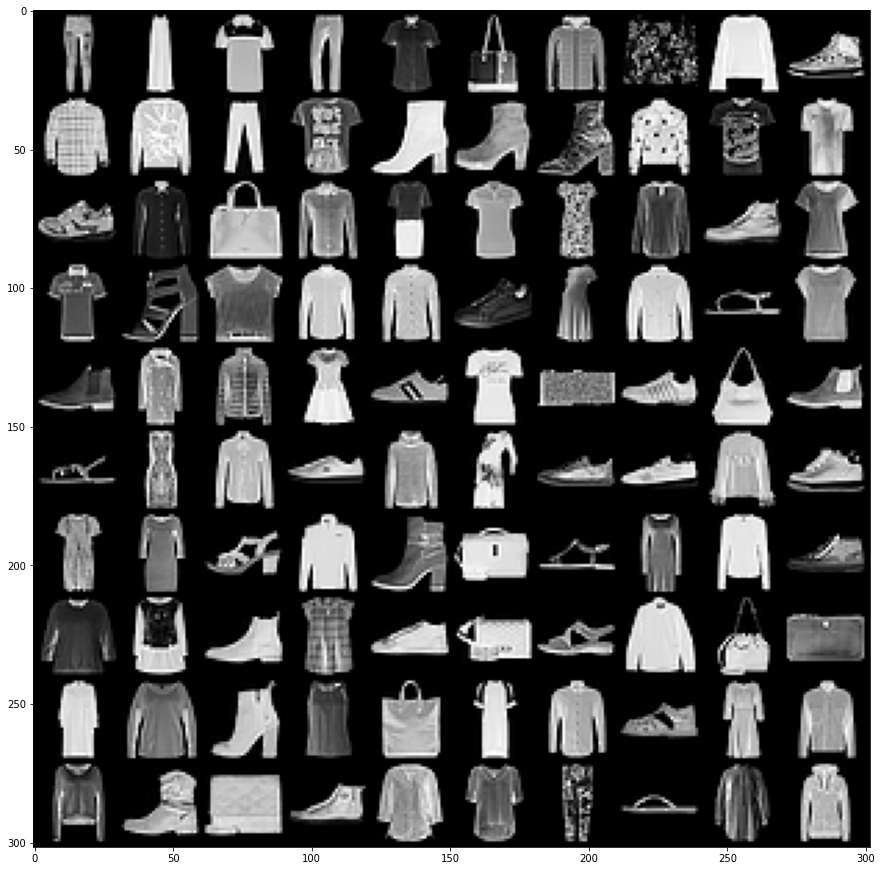

In [21]:
dataiter = iter(train_loader)
print(dataiter)
images, labels = next(dataiter)
print(type(images), type(labels))
print(images.shape, labels.shape)

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("Class_labels: ", )
for i, label in enumerate(labels):
    print(mapping(label), end=", ")

## <font color='green'>**5. Model Development**</font>
### **Define the model**
For this project a fully connected layers is used to develop a [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)
Once the incoming 28x28 tensors is flattened, the input size is 784. The output size represents the 10 possible digits. The hidden layers are set to [120, 84] for now. 

In [22]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [23]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### **Count the model parameters**
This optional step shows that the number of trainable parameters in the model matches the code above.

In [24]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [25]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
______
105214


### **Define loss function & optimizer**

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### **Flatten the training data**
The batch tensors fed in by DataLoader have a shape of [100, 1, 28, 28]:

In [27]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break
    
# EQUIVALENT TO:
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# print('Batch shape:', images.size())

Batch shape: torch.Size([100, 1, 28, 28])


Flatten them using .view()

In [28]:
images.view(100,-1).size()

torch.Size([100, 784])

This should be done just before applying the model to the data.

### **Train the model**
This time the test data is run through the model during each epoch, so that  loss & accuracy can be compared on the same plot.

In the section below marked Tally the number of correct predictions the below mentioned code

`````````
predicted = torch.max(y_pred.data, 1)[1]

````````````


This uses the [torch.max()](https://pytorch.org/docs/stable/torch.html#torch.max) function. 

torch.max() returns a tensor of maximum values, and a tensor of the indices where the max values were found. In this code the index positions of the maximum values along dimension 1 is asked for. In this way predictions up to image labels can be matched.

This is essentially transforming the maximum softmax probabilities into something that looks like, for example, the number nine, just a single digit nine from a set of softmax probabilities. 

For example 10 probabilities for 10 neurons as we are using softmax in the output. 'torch.max' selects that neuron with max probability.  

In [29]:
import time
start_time = time.time()

#Training
epochs = 10

#Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
#the train loader returns back the image and its label and with enumerate, it's actually going to keep track of what batch number model is on with b.    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0: # if our batch size is evenly divisible by 200
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            labels_list.append(y_test)

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            predictions_list.append(predicted)
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.43768600  accuracy:  71.330%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.41759002  accuracy:  77.052%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.33781552  accuracy:  79.362%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.40384308  accuracy:  85.030%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.33370948  accuracy:  85.345%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.35235256  accuracy:  85.527%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.45040008  accuracy:  86.455%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.20362699  accuracy:  86.770%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.22880793  accuracy:  86.860%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.39784181  accuracy:  87.690%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.25347003  accuracy:  87.843%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.38248441  accuracy:  87.933%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.24390632  accuracy:  88.500%
epoch:  4  b

### **Plot the loss and accuracy comparisons**

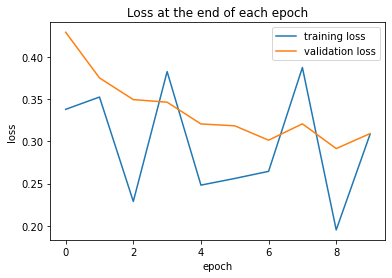

In [30]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss at the end of each epoch')
plt.legend();

This shows some evidence of overfitting the training data.

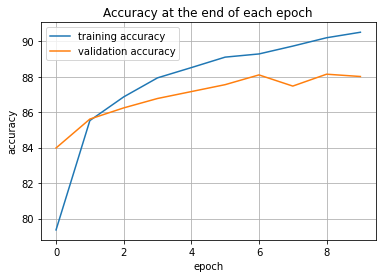

In [31]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(visible=True)
plt.legend();

## <font color='green'>**6. Evaluate Test Data**</font>
The model has retained the test scores during the training session.

In [32]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(8398), tensor(8561), tensor(8624), tensor(8677), tensor(8716), tensor(8755), tensor(8810), tensor(8747), tensor(8814), tensor(8801)]

Test accuracy: 88.010%


However, to compare the predicted values to the ground truth (the y_test labels, run the test set through the trained model all at once.

In [33]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [34]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8801/10000 =  88.010%


To check the Accuracy of each individual class_label of FashionMNIST dataset

In [35]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_load_all:
        y_val = model(images.view(len(images), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(mapping(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/top: 87.50%
Accuracy of Trouser: 100.00%
Accuracy of Pullover: 85.71%
Accuracy of Dress: 88.89%
Accuracy of Coat: 80.00%
Accuracy of Sandal: 100.00%
Accuracy of Shirt: 75.00%
Accuracy of Sneaker: 100.00%
Accuracy of Bag: 100.00%
Accuracy of Ankle boot: 66.67%


### **Display the Confusion Matrix & Classification Report**
This uses scikit-learn, and the predicted values obtained above.

In [36]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 763    1   11   10    0    0   70    0    3    0]
 [   1  976    2   13    1    0    2    0    0    0]
 [  13    0  774    6   71    0   82    0    3    0]
 [  42   19   22  925   58    1   40    0    6    0]
 [   4    2  124   16  834    0   97    0    1    0]
 [   1    0    0    0    0  942    0   10    2    5]
 [ 170    1   65   25   32    0  691    0    3    1]
 [   0    0    0    0    0   31    0  973    5   48]
 [   6    1    2    5    4    1   18    0  977    0]
 [   0    0    0    0    0   25    0   17    0  946]]


This shows that the model had the greatest success with ones (Trousers), eights (Bags) and sevens (Sneakers), and the lowest with sixes (Shirts), twos (Pullovers) and zeros (T-shirt/tops).

In [37]:
class_labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [38]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

import sklearn.metrics as metrics
print("Classification report for FashionMNIST ANN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for FashionMNIST ANN :
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     10000
           1       0.98      0.97      0.98     10000
           2       0.78      0.78      0.78     10000
           3       0.85      0.89      0.87     10000
           4       0.76      0.79      0.77     10000
           5       0.96      0.95      0.95     10000
           6       0.71      0.62      0.66     10000
           7       0.93      0.94      0.94     10000
           8       0.96      0.97      0.96     10000
           9       0.94      0.95      0.95     10000

    accuracy                           0.87    100000
   macro avg       0.87      0.87      0.87    100000
weighted avg       0.87      0.87      0.87    100000




### Examine the misses
Now, track the index positions of "missed" predictions, and extract the corresponding image and label. Have to do this in batches to save screen space.

In [39]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

1199

In [40]:
# Display the first 10 index positions
misses[:10]

array([  23,   25,   27,   40,   42,   49,   51,   66,   68,   89])

In [41]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.

Use Ctrl+Enter to remain on the cell between runs. StopIteration message will be seen once all the misses have been seen.

Index: [  23   25   27   40   42   49   51   66   68   89  103  107]
Label: [   9    4    0    6    3    2    4    2    9    6    2    9]
Guess: [   5    2    6    0    6    6    2    3    7    2    6    7]


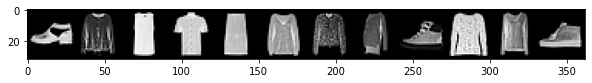

In [42]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## <font color='green'>**7. Model Prediction**</font>

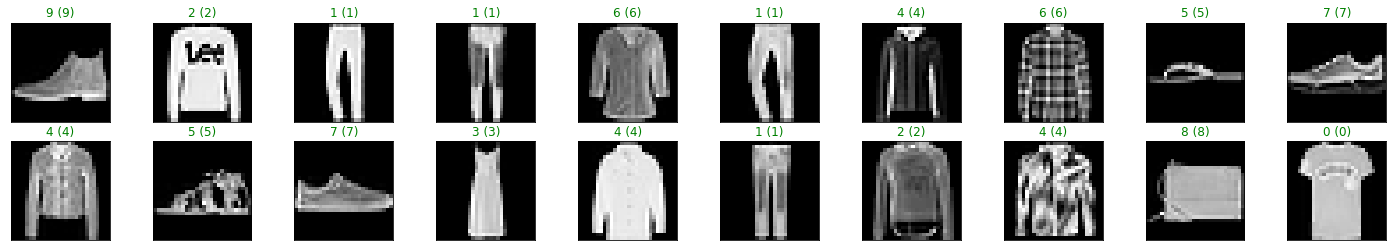

In [43]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images.view(len(images), -1))  # pass in a flattened view of X_test
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))